<a href="https://colab.research.google.com/github/rajpratap1411/-Power-BI-Sales-dashboard-Project/blob/main/Delivery_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import data
data = pd.read_csv(r'/content/package_delivery_dataset.csv')

In [4]:
print(data.shape)
data.head(5)

(500, 7)


,order_id,order_price,customer_lat,customer_lon,distance_to_customer_KM,delivery_fee,weight_in_gm
0,ORDC01406,140.80,12.9766,77.5993,8.335,13.700428,818.2
1,ORDZ10125,313.50,12.9770,77.5773,7.536,6.167473,960.0
2,ORDZ04175,714.00,12.9551,77.6593,9.860,15.088928,1255.5
3,ORDI03691,480.25,12.9473,77.5616,8.614,13.684368,757.5
4,ORDZ04094,497.75,12.9850,77.5533,8.802,13.760744,381.0


In [5]:
# Reordering the columns
data = data.reindex(['order_id', 'customer_lat', 'customer_lon', 'distance_to_customer_KM', 'weight_in_gm', 'order_price',
                     'delivery_fee'], axis='columns')

In [6]:
print(data.shape)
data.head(5)

(500, 7)


,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_gm,order_price,delivery_fee
0,ORDC01406,12.9766,77.5993,8.335,818.2,140.80,13.700428
1,ORDZ10125,12.9770,77.5773,7.536,960.0,313.50,6.167473
2,ORDZ04175,12.9551,77.6593,9.860,1255.5,714.00,15.088928
3,ORDI03691,12.9473,77.5616,8.614,757.5,480.25,13.684368
4,ORDZ04094,12.9850,77.5533,8.802,381.0,497.75,13.760744


### Data Processing

In [7]:
data.describe()

,customer_lat,customer_lon,distance_to_customer_KM,weight_in_gm,order_price,delivery_fee
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,12.971759,77.599389,8.701362,514.35650,499.384900,13.923984
std,0.043107,0.050778,1.621212,271.75909,273.778058,2.509774
min,12.865200,77.484200,4.077000,59.50000,46.400000,4.207491
25%,12.936900,77.569100,7.726000,299.75000,287.000000,12.737816
50%,12.977000,77.590000,8.788000,461.12500,447.300000,14.039342
75%,12.996700,77.625600,9.840250,687.00000,673.500000,15.399362
max,13.102000,77.758200,12.892000,1255.50000,1465.500000,22.112749


### Exploratory Analysis

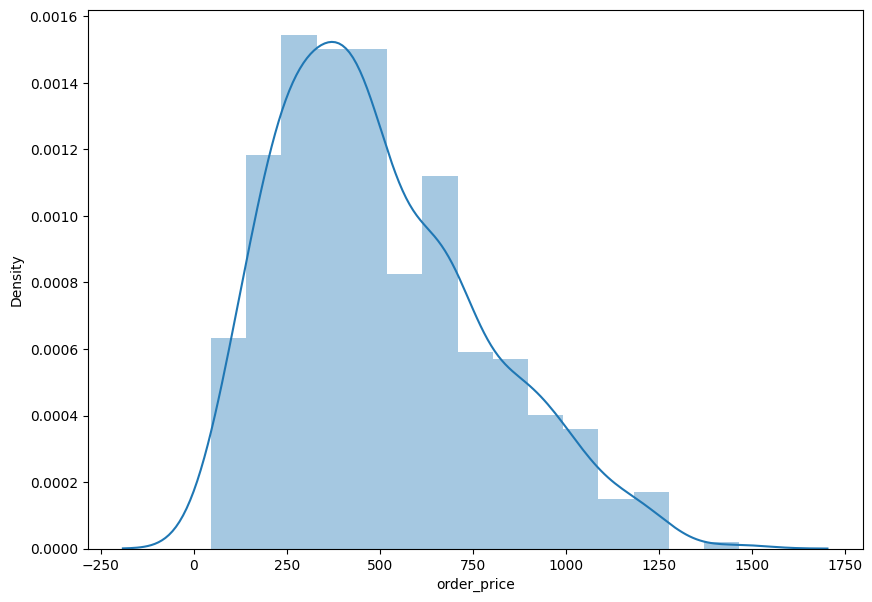

In [8]:
# The price distribution of the orders
fig = plt.figure(figsize=(10,7))
ax = sns.distplot(data['order_price'])

In [9]:
minPrice = min(data.order_price)
maxPrice = max(data.order_price)
print('Min order price :', minPrice)
print('Max order price :', maxPrice)

Min order price : 46.4
Max order price : 1465.5


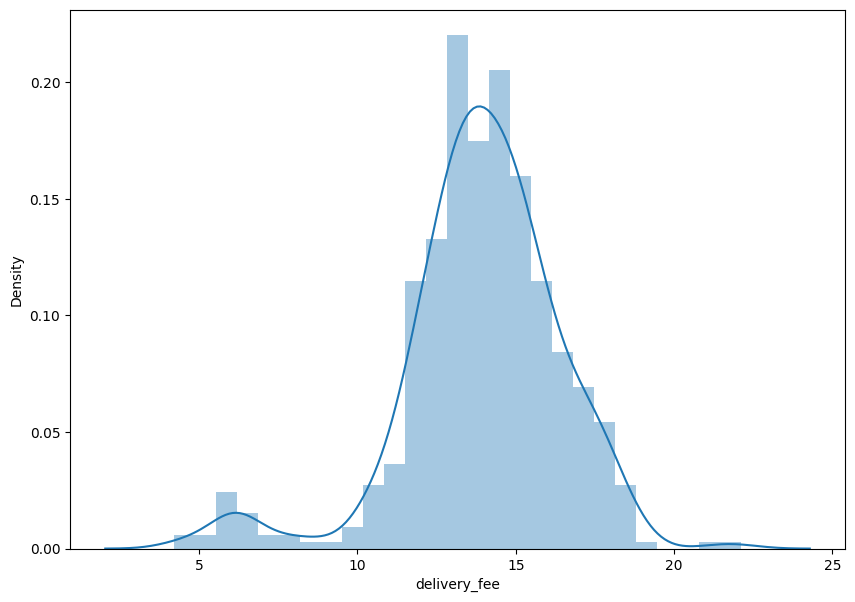

In [10]:
# The delivery fee distribution of the orders
fig = plt.figure(figsize=(10,7))
ax = sns.distplot(data['delivery_fee'])

In [11]:
minFee = min(data.delivery_fee)
maxFee = max(data.delivery_fee)
print('Min delivery fee :', minFee)
print('Max delivery fee :', maxFee)

Min delivery fee : 4.2074907
Max delivery fee : 22.1127494


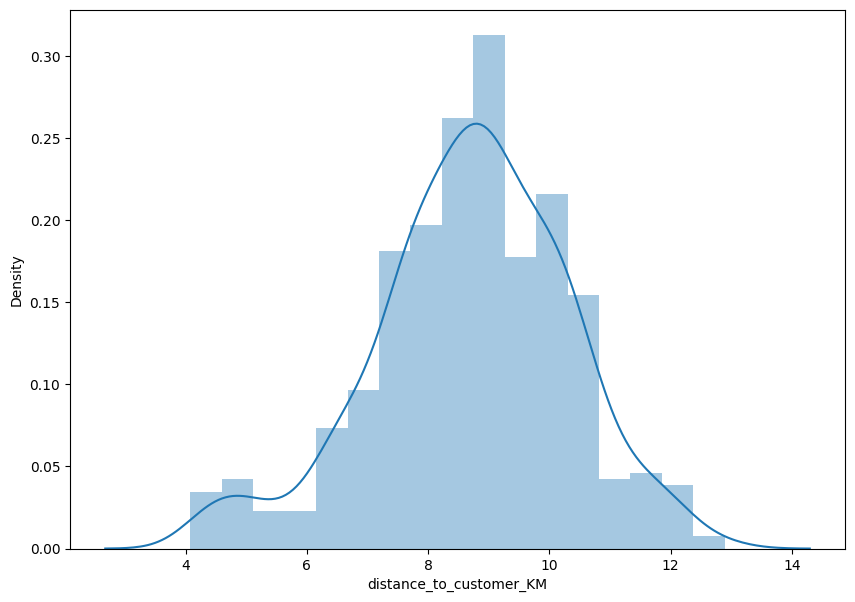

In [12]:
# The customer distance distribution of the orders
fig = plt.figure(figsize=(10,7))
ax = sns.distplot(data['distance_to_customer_KM'])

In [13]:
minDist = min(data.distance_to_customer_KM)
maxDist = max(data.distance_to_customer_KM)
print('Min Distance (in km) :', minDist)
print('Max Distance (in km) :', maxDist)

Min Distance (in km) : 4.077
Max Distance (in km) : 12.892


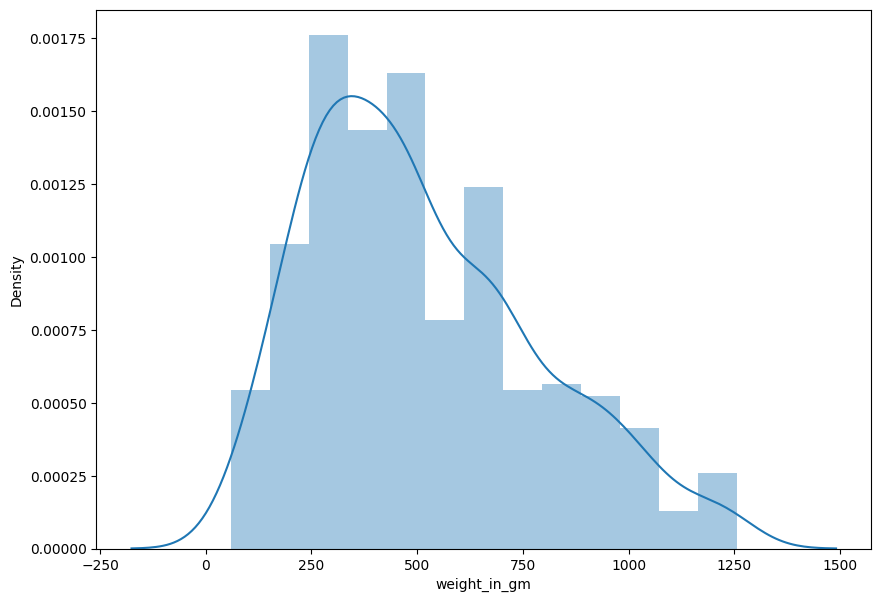

In [14]:
# The weight distribution of the orders
fig = plt.figure(figsize=(10,7))
ax = sns.distplot(data['weight_in_gm'])

In [15]:
minWeight = min(data.weight_in_gm)
maxWeight = max(data.weight_in_gm)
print('Min Weight (in gm) :', minWeight)
print('Max Weight (in gm) :', maxWeight)

Min Weight (in gm) : 59.5
Max Weight (in gm) : 1255.5


### Mapping: Get the address from the latitude and longitude

In [16]:
# Convert the latitudes and longitudes into string and append them into a list
latitudes = []
for lat in data['customer_lat']:
    latitudes.append(str(lat))

longitudes = []
for lon in data['customer_lon']:
    longitudes.append(str(lon))

In [17]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [18]:
def get_address(latitude, longitude):
    address = []
    for latitude in latitudes:
        for longitude in longitudes:
            # Get location with geocode
            location = geolocator.geocode(latitude + "," + longitude)
            address.append(str(location))
            return address

In [20]:
# Calling the function with custom values
!pip install geopy

from geopy.geocoders import Nominatim
import time

# Initialize geolocator with a custom user agent
geolocator = Nominatim(user_agent="my_custom_user_agent") # Changed user agent to something more descriptive

def get_address(latitude, longitude):
    # Get location with geocode, directly using provided coordinates
    location = geolocator.geocode(f"{latitude},{longitude}")

    # Handle case where location is not found
    if location:
        address = str(location)
    else:
        address = "Address not found"

    return address # Return the found address

# Calling the function with custom values, note the values are passed as arguments to the function
address = get_address("12.9766", "77.5993")
print(address)

# If you need to process multiple coordinates, introduce a delay
# latitudes = [...] # Assuming you have a list of latitudes
# longitudes = [...] # Assuming you have a list of longitudes

# for lat, lon in zip(latitudes, longitudes):
#     address = get_address(lat, lon)
#     print(address)
#     time.sleep(1) # Pause for 1 second between requests to avoid overloading the server

Mahatma Gandhi Circle, Queen's Road, Tasker Town, Shanthala Nagar, Bengaluru, Bangalore North, Bengaluru Urban, Karnataka, 560001, India


### Reverse Mapping: Get the latitude and longitude from the address

In [21]:
def get_latlon(address):
    # Provide the address
    location = geolocator.geocode(address)
    print("The latitude of the location is: ", location.latitude)
    print("The longitude of the location is: ", location.longitude)
    return (location.latitude, location.longitude)

In [23]:
# Calling the function with custom values
def get_latlon(address):
    # Provide the address
    location = geolocator.geocode(address)

    # Check if location was found before accessing attributes
    if location:
        print("The latitude of the location is: ", location.latitude)
        print("The longitude of the location is: ", location.longitude)
        return (location.latitude, location.longitude)
    else:
        print(f"Could not find location for address: {address}")
        return (None, None) # Or raise an exception if appropriate

### Plot the points on the map

In [24]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [25]:
# First, pass in the median of the latitude and longitude coordinates so as to centre the map there
map1 = folium.Map(location=[data.customer_lat.median(), data.customer_lon.median()], tiles='cartodbpositron',
                  control_scale=True)


# Now, iterate through each row of the dataframe, and pass the latitude and longitudes to the map
for index, location_info in data.iterrows():
    folium.Marker([location_info['customer_lat'], location_info['customer_lon']],
                  zoom_start=20, popup=location_info['distance_to_customer_KM']).add_to(map1)


# create a map
map1.save("map1.html")
# Displaying the map
map1

### Clustered Location on the map

In [26]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math

In [27]:
# First, pass in the median of the latitude and longitude coordinates so as to centre the map there
map2 = folium.Map(location=[data.customer_lat.median(), data.customer_lon.median()], tiles='cartodbpositron',
                  zoom_start=13, control_scale=True)

# Adding points to the map
mc = MarkerCluster().add_to(map2)

for index, location_info in data.iterrows():
    folium.Marker([location_info['customer_lat'], location_info['customer_lon']]).add_to(mc)
folium.LayerControl().add_to(map2)

# Displaying the map
map2.save("map2.html")
map2

In [28]:
# check for categorical columns
cat_col = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['order_id']

In [29]:
print(data.shape)
data.head(5)

(500, 7)


,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_gm,order_price,delivery_fee
0,ORDC01406,12.9766,77.5993,8.335,818.2,140.80,13.700428
1,ORDZ10125,12.9770,77.5773,7.536,960.0,313.50,6.167473
2,ORDZ04175,12.9551,77.6593,9.860,1255.5,714.00,15.088928
3,ORDI03691,12.9473,77.5616,8.614,757.5,480.25,13.684368
4,ORDZ04094,12.9850,77.5533,8.802,381.0,497.75,13.760744


In [30]:
# Create a new column 'delivery allocation order'
data = data.sort_values(by=['delivery_fee','distance_to_customer_KM','weight_in_gm','order_price'],
                        axis=0, ascending=[False,True,True,False]).reset_index(drop=True)

data['delivery_allocation_order'] = np.arange(data.shape[0])+1

In [31]:
print(data.shape)
data.head(5)

(500, 8)


,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_gm,order_price,delivery_fee,delivery_allocation_order
0,ORDK09639,12.9706,77.6529,12.767,381.0,170.0,22.112749,1
1,ORDX10028,12.9770,77.5773,9.972,378.0,534.5,21.374786,2
2,ORDK06915,12.8652,77.5240,10.352,219.0,890.2,18.893250,3
3,ORDK05717,12.9698,77.7500,11.494,447.0,675.0,18.769927,4
4,ORDA06644,13.0019,77.5713,10.692,329.0,694.0,18.768732,5


In [32]:
# Make a copy of the dataset
delivery = data.copy()

# Drop off the 'order_id' column
delivery = delivery.drop("order_id", axis=1)
delivery.head(5)

,customer_lat,customer_lon,distance_to_customer_KM,weight_in_gm,order_price,delivery_fee,delivery_allocation_order
0,12.9706,77.6529,12.767,381.0,170.0,22.112749,1
1,12.9770,77.5773,9.972,378.0,534.5,21.374786,2
2,12.8652,77.5240,10.352,219.0,890.2,18.893250,3
3,12.9698,77.7500,11.494,447.0,675.0,18.769927,4
4,13.0019,77.5713,10.692,329.0,694.0,18.768732,5


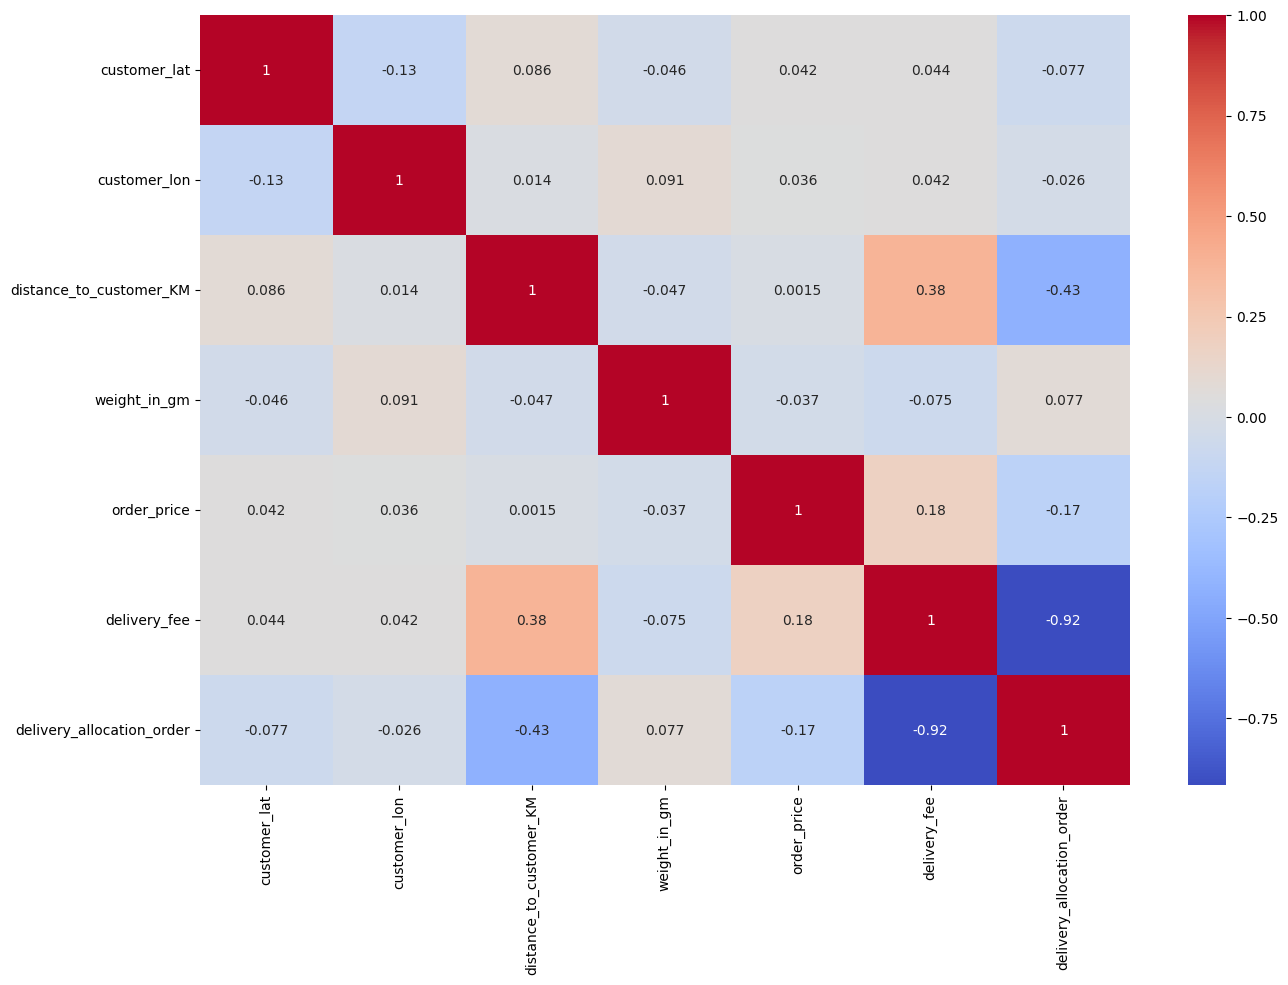

In [33]:
# Correlation among all the numeric variables
plt.figure(figsize=(15,10))
sns.heatmap(delivery.corr(), annot=True, cmap = "coolwarm")
plt.show()

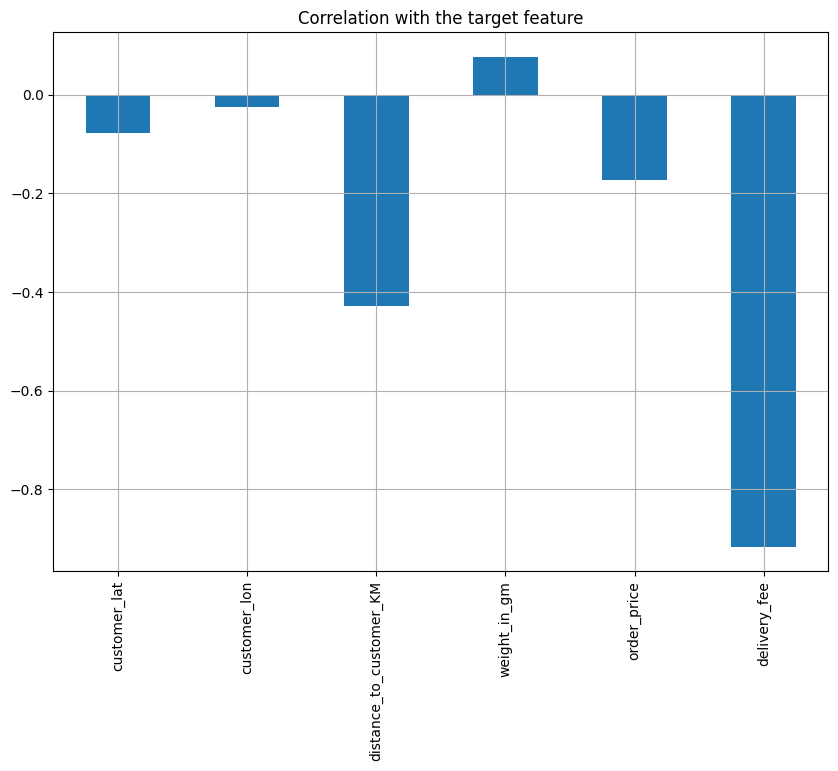

In [34]:
delivery.drop('delivery_allocation_order',axis=1).corrwith(delivery['delivery_allocation_order']).plot(kind='bar',grid=True,
                                                                                                       figsize=(10, 7),
                                                                                                       title="Correlation with the target feature")
plt.show()

### Building our model

In [35]:
# Define the 'features' and 'labels'
X = delivery.drop('delivery_allocation_order', axis='columns')
y = delivery['delivery_allocation_order']

In [36]:
# Define train : test dataset in 70 : 30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# Scale down i/p features for better results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Linear Regressor model

In [38]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred1 = model.predict(X_test)

In [39]:
# evaluating our model
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean absolute error: ", mean_absolute_error(y_test, y_pred1))
print("Mean squared error: ", mean_squared_error(y_test, y_pred1))

Mean absolute error:  45.76560919583819
Mean squared error:  3514.981305241195


In [40]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred1)*100)

84.65142146856705


### XGBoost Regressor model

In [41]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(max_depth=5)

# Train the model on the training set
xgb_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred2 = xgb_reg.predict(X_test)

In [42]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred2)*100)

99.9514102935791


### Feature Importance

In [43]:
# get importance
importance = pd.DataFrame({
    'Feature': delivery.drop('delivery_allocation_order', axis=1).columns,
    'Importance': model.coef_
})

importance = importance.sort_values(by='Importance', ascending=False)
importance = importance.set_index('Feature')
importance

,Importance
Feature,
weight_in_gm,3.713956
customer_lon,1.511909
customer_lat,-2.012266
order_price,-2.559446
distance_to_customer_KM,-11.604111
delivery_fee,-123.798117


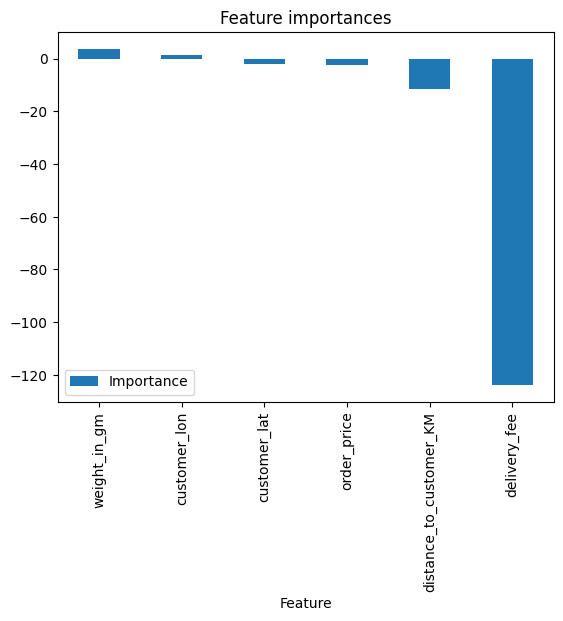

In [44]:
# Plot feature importance
importance.plot.bar()
plt.title("Feature importances")
plt.show()

In [45]:
# Clearly, 'delivery_fee' has the highest influence in determining the allocation of orders

### Making Predictions

In [46]:
X.columns

Index(['customer_lat', 'customer_lon', 'distance_to_customer_KM',
       'weight_in_gm', 'order_price', 'delivery_fee'],
      dtype='object')

In [47]:
def predict(distance_to_customer_KM, weight_in_gm, order_price, delivery_fee):
    x = np.zeros(len(X.columns))
    x[2] = distance_to_customer_KM
    x[3] = weight_in_gm
    x[4] = order_price
    x[5] = delivery_fee

    return xgb_reg.predict([x])[0]

In [48]:
predict(8.1, 98.3, 250, 13.5)

5.13707

In [49]:
final_pred = xgb_reg.predict(X_test)

In [50]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': final_pred})
df

,Actual,Predicted
361,362,364.112152
73,74,82.077721
374,375,380.068451
155,156,159.064819
104,105,108.506172
...,...,...
266,267,269.917084
23,24,26.154469
222,223,222.436050
261,262,261.691437


In [51]:
df['Predicted'] = df['Predicted'].astype(int)
df

,Actual,Predicted
361,362,364
73,74,82
374,375,380
155,156,159
104,105,108
...,...,...
266,267,269
23,24,26
222,223,222
261,262,261


In [52]:
final_df = df['Predicted']
final_df = df.drop('Actual', axis=1)

In [53]:
X = data.iloc[:,0:1]

X["delivery_allocation_order"] = final_df

In [54]:
X = X.sort_values(by=['delivery_allocation_order'], axis=0, ascending=[True]).reset_index(drop=True)
X.head(5)

,order_id,delivery_allocation_order
0,ORDK06915,5.0
1,ORDK09639,6.0
2,ORDZ03159,10.0
3,ORDA09040,12.0
4,ORDK01269,17.0


In [55]:
export_csv = X.to_csv(r'C:\Users\Rajashri\Desktop\food_analysis\Package delivery\predictions.csv',
                      index=None, header=True)
print("Successfully Exported!!")

Successfully Exported!!
